In [159]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

from sklearn import metrics 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.linear_model import LogisticRegression

In [59]:
df = pd.read_csv('data.csv',sep=';')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41087 entries, 0 to 41086
Data columns (total 2 columns):
ID          41087 non-null int64
Question    41087 non-null object
dtypes: int64(1), object(1)
memory usage: 642.1+ KB
None


,ID,Question
0,1,Как зовут лодочника на реке Стикс в древнегреч...
1,2,Как в химии обозначается свинец?
2,3,Какой химический элемент преобладает в составе...
3,4,Кто из перечисленных был пажом во времена Екат...
4,5,Когда началась 2 мировая война?


In [3]:
df.iloc[9,:]

ID                                  10
Question    Кто написал повесть «Муму»
Name: 9, dtype: object

In [4]:
df_train = df.loc[:29999]

In [5]:
y = pd.read_csv('train.csv',sep=';')
print(y.info())
y.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
ID        30000 non-null int64
Answer    30000 non-null int64
dtypes: int64(2)
memory usage: 468.9 KB
None


,ID,Answer
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [6]:
y['Answer'].value_counts()#0 -вопросы пользователей

0    26884
1     3116
Name: Answer, dtype: int64

In [7]:
df_test = df.loc[30000:]

In [65]:
df_train.iloc[y[y['Answer']==0].index]

,ID,Question
0,1,Как зовут лодочника на реке Стикс в древнегреч...
2,3,Какой химический элемент преобладает в составе...
3,4,Кто из перечисленных был пажом во времена Екат...
4,5,Когда началась 2 мировая война?
6,7,Кто из животных может мурлыкать?
...,...,...
29995,29996,"Как называется игра, местом действия которой я..."
29996,29997,Как в опере называют ведущую певицу?
29997,29998,На какой планете сутки длиннее года?
29998,29999,Сколько лет пролежал на печи известный богатыр...


In [8]:
questions_text = df.iloc[:,1]

In [9]:
# Countvectorizer = CountVectorizer(strip_accents='unicode', 
#                 analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1, 1), max_features=30000)

# X_countVec = Countvectorizer.fit_transform(questions_text)
# print("Every feature:\n{}".format(Countvectorizer.get_feature_names()[:10]))


In [10]:
# print("Every feature:\n{}".format(Countvectorizer.get_feature_names()[:10]))

In [11]:
#СИМВОЛЫ
count_symbols = CountVectorizer(lowercase = False, token_pattern = "[\"”“„«»'.,+\\-*/ –()!?\\\\:<>=|^’%—;…№#°@{}\\[\\]_$]")
X_countVec_symbols = count_symbols.fit_transform(questions_text)
print(count_symbols.get_feature_names())

[' ', '!', '"', '#', '$', '%', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '{', '|', '}', '«', '°', '»', '–', '—', '’', '“', '”', '„', '…', '№']


In [12]:
#ГОДЫ
count_years = CountVectorizer(strip_accents='unicode', 
                analyzer='word', token_pattern=r'[12]\d{3}', ngram_range=(1, 1))

X_countVec_years = count_years.fit_transform(questions_text)
print("Years feature:\n{}".format(count_years.get_feature_names()[:10]))


Years feature:
['1000', '1001', '1005', '1016', '1019', '1054', '1058', '1080', '1110', '1113']


In [13]:
#ИМЕНА
count_names = CountVectorizer(strip_accents='unicode', 
                analyzer='word', token_pattern=r'[А-Я][а-я]{1,}[ -][А-Я][а-я]{1,}', 
                              lowercase=False,
                              ngram_range=(1, 1))

X_countVec_names = count_names.fit_transform(questions_text)
print("Name feature:\n{}".format(count_names.get_feature_names()[:10]))


Name feature:
['Абаи Кунанбаев', 'Абаи Кунанбаи', 'Авврам Линкольн', 'Август Кекуле', 'Авраам Линкольн', 'Авраам Линкольна', 'Аврил Лавин', 'Австро-Венгрии', 'Австро-Венгрия', 'Автомат Калашников']


In [14]:
#ЧИСЛА
count_numbers = CountVectorizer(strip_accents='unicode', 
                analyzer='word', token_pattern=r'[03-9]\d*|[12]\d{4,}|[12]\d{0,2}', ngram_range=(1, 1), max_features=30000)

X_countVec_numbers = count_numbers.fit_transform(questions_text)
print("Numbers feature:\n{}".format(count_numbers.get_feature_names()))

Numbers feature:
['0', '00', '000', '007', '01', '011235', '02', '03', '04', '05', '06', '07', '08', '09', '1', '10', '100', '10000', '100000', '1000000', '10000000', '1000000000', '100500', '101', '103', '105', '108', '11', '110', '111', '113', '114', '115', '116', '117', '119', '12', '120', '12000', '12000000', '121', '122', '123', '124', '127', '128', '13', '131', '132', '134', '138', '14', '140', '141592', '143', '144', '145', '146', '149', '15', '150', '152', '154', '155', '156', '157', '158', '16', '160', '161', '164', '166', '167', '168', '169', '17', '170', '171', '171022882', '172', '173', '174', '175', '176', '177', '178', '179', '18', '180', '18000', '181', '182', '183', '184', '185', '186', '187', '188', '189', '19', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '2', '20', '200', '200000', '201', '202', '203', '204218', '205', '20712357', '21', '210', '21013', '211', '212', '21211', '216', '22', '220', '222', '225', '226666506', '23', '24', '243', '2

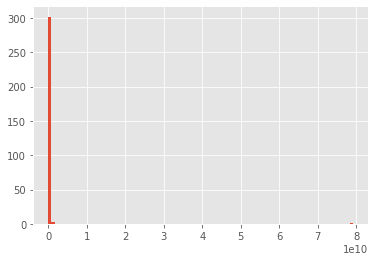

In [160]:
plt.hist([int(x) for x in count_numbers.get_feature_names()],bins=100);

In [16]:
numbers = pd.DataFrame.sparse.from_spmatrix(X_countVec_numbers)
numbers.columns = count_numbers.get_feature_names()
numbers

,0,00,000,007,01,011235,02,03,04,05,...,965,967,968,98,986,988,99,990,9922,999999999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
numbers_over_11mln = numbers[[x for x in count_numbers.get_feature_names() if int(x)>=11000000]].sum(axis=1)

In [18]:
#делаем бинарные - есть ли в вопросе большое число или нет
for i in range(len(numbers_over_11mln)):
    if numbers_over_11mln[i]>=1:
        numbers_over_11mln[i] = 1
    else:
        numbers_over_11mln[i] = 0

In [19]:
numbers_over_11mln = np.matrix(numbers_over_11mln).reshape((numbers_over_11mln.shape[0], 1))

In [20]:
numbers_less_11mln = numbers[[x for x in count_numbers.get_feature_names() if int(x)<11000000]].sum(axis=1)

In [21]:
sum(numbers_less_11mln)

7391

In [22]:
#делаем бинарные - есть ли в вопросе число меньше 11 млн. или нет
for i in range(len(numbers_less_11mln)):
    if numbers_less_11mln[i]>=1:
        numbers_less_11mln[i] = 1
    else:
        numbers_less_11mln[i] = 0

In [23]:
sum(numbers_less_11mln)

3993

In [24]:
numbers_less_11mln = np.matrix(numbers_less_11mln).reshape((numbers_less_11mln.shape[0], 1))

In [25]:
#КАВЫЧКИ
# count_quotes = CountVectorizer(token_pattern = r'.*".*')
# X_countVec_quotes = count_quotes.fit_transform(questions_text)
# print(count_quotes.get_feature_names()[:20])

In [163]:
#СЛОВА
count_words = CountVectorizer(strip_accents='unicode', 
                analyzer='word', token_pattern=r'[А-ЯA-Zа-яa-z]+', ngram_range=(1, 3), max_features=50000)

X_countVec_words = count_words.fit_transform(questions_text)
print("Words feature:\n{}".format(count_words.get_feature_names()[:10]))

Words feature:
['No', 'No на', 'No на шенбруннер', 'No считается', 'No считается необходимым', 'a', 'a ab', 'a ab b', 'a b', 'a b a']


In [27]:
#РИМСКИЕ ЦИФРЫ
count_roman_num = CountVectorizer(strip_accents='unicode', lowercase = False,
                analyzer='word', token_pattern=r'[IVXLCDM]+|[ivxlcdm]+', ngram_range=(1, 1))

X_countVec_roman_num = count_roman_num.fit_transform(questions_text)
print("Words feature:\n{}".format(count_roman_num.get_feature_names()))

Words feature:
['C', 'CCI', 'CI', 'CMD', 'CVV', 'D', 'DC', 'DI', 'DID', 'DM', 'DMC', 'I', 'IC', 'ID', 'II', 'III', 'IL', 'IM', 'IMD', 'IV', 'IX', 'L', 'LI', 'LV', 'M', 'MC', 'MI', 'ML', 'MV', 'MX', 'V', 'VI', 'VII', 'VIII', 'X', 'XCX', 'XI', 'XII', 'XIII', 'XIV', 'XIX', 'XLV', 'XV', 'XVI', 'XVII', 'XVIII', 'XX', 'XXI', 'XXVII', 'XXX', 'XXXIII', 'c', 'cc', 'cci', 'ci', 'cl', 'd', 'dc', 'dd', 'di', 'did', 'div', 'dl', 'dm', 'dv', 'i', 'ic', 'ici', 'id', 'idi', 'ii', 'il', 'ild', 'ili', 'ill', 'im', 'imi', 'iv', 'ivi', 'ix', 'l', 'lc', 'ld', 'li', 'lim', 'liv', 'lix', 'll', 'lli', 'llic', 'lll', 'lm', 'lv', 'lvi', 'm', 'mc', 'mi', 'mic', 'mix', 'ml', 'mm', 'mv', 'v', 'vi', 'vicii', 'vid', 'viv', 'x', 'xi', 'xlx', 'xxx']


In [28]:
#наличие римских цифр в вопросе
roman_num = X_countVec_roman_num.sum(axis=1)
for i in range(len(roman_num)):
    if roman_num[i]>=1:
        roman_num[i] = 1
    else:
        roman_num[i] = 0

sum(roman_num)

matrix([[1874]], dtype=int64)

In [29]:
#наличие годов в вопросе
years = X_countVec_years.sum(axis=1)
for i in range(len(years)):
    if years[i]>=1:
        years[i] = 1
    else:
        years[i] = 0

sum(years)

matrix([[1756]], dtype=int64)

In [30]:
#наличие имён в вопросе
names = X_countVec_names.sum(axis=1)
print(sum(names))
for i in range(len(names)):
    if names[i]>=1:
        names[i] = 1
    else:
        names[i] = 0

sum(names)

[[7617]]


matrix([[7057]], dtype=int64)

In [31]:
X_countVec_symbols.toarray()

array([[8, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       ...,
       [9, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
#объединяем матрицу с вектором
np.append(X_countVec_symbols.toarray(),roman_num,axis=1)

matrix([[8, 0, 0, ..., 0, 0, 0],
        [4, 0, 0, ..., 0, 0, 0],
        [7, 0, 0, ..., 0, 0, 0],
        ...,
        [9, 0, 0, ..., 0, 0, 0],
        [7, 0, 0, ..., 0, 0, 0],
        [5, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
roman = pd.DataFrame.sparse.from_spmatrix(X_countVec_roman_num)

In [34]:
roman.iloc[0,:]

0      0
1      0
2      0
3      0
4      0
      ..
106    0
107    0
108    0
109    0
110    0
Name: 0, Length: 111, dtype: Sparse[int64, 0]

In [35]:
from scipy.sparse import hstack

In [164]:
X_counts = hstack((X_countVec_symbols, years, names, numbers_over_11mln, 
                   numbers_less_11mln, roman_num, X_countVec_words)).tocsr()

In [165]:
X_counts

<41087x316251 sparse matrix of type '<class 'numpy.int64'>'
	with 897767 stored elements in Compressed Sparse Row format>

In [166]:
X_countVec_train = X_counts[:30000]
X_countVec_test = X_counts[30000:]

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_countVec_train, y.iloc[:,1], test_size=0.33, random_state=42)

print("X_train:", X_train.shape, " y_train:", y_train.shape,
      " X_test:", X_test.shape, " y_test:", y_test.shape)

X_train: (20100, 316251)  y_train: (20100,)  X_test: (9900, 316251)  y_test: (9900,)


In [40]:
from sklearn.naive_bayes import MultinomialNB

In [168]:
clf = MultinomialNB()
NB = clf.fit(X_train, y_train)

estimates = {'roc_auc': [metrics.roc_auc_score(y_train, NB.predict(X_train))],
             'log_loss': [metrics.log_loss(y_train, NB.predict(X_train))]}

estimates_CountVectorizerizer = pd.DataFrame(estimates, index = ['score'])
estimates_CountVectorizer

,roc_auc,log_loss
score,0.686961,2.635955


In [169]:
NB.score(X_train, y_train)

0.9051243781094528

In [170]:
conf_mat = metrics.confusion_matrix(y_test, NB.predict(X_test))
conf_mat = pd.DataFrame(conf_mat, index=NB.classes_, columns=NB.classes_)
conf_mat

,0,1
0,8824,40
1,1036,0


In [171]:
print (metrics.classification_report(y_test, NB.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      8864
           1       0.00      0.00      0.00      1036

    accuracy                           0.89      9900
   macro avg       0.45      0.50      0.47      9900
weighted avg       0.80      0.89      0.84      9900



In [44]:
# from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
# vectorizer = TfidfVectorizer(sublinear_tf=True, strip_accents='unicode', 
#                 analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1, 1), max_features=30000)

# X = vectorizer.fit_transform(questions_text)
# print(vectorizer.get_feature_names()[:10])

# X_Tfid_train = X_countVec[:30000]
# X_Tfid_test = X_countVec[30001:]

# X_train, X_test, y_train, y_test = train_test_split(X_Tfid_train, y.iloc[:,1], test_size=0.33, random_state=42)

# print("X_train:", X_train.shape, " y_train:", y_train.shape,
#       " X_test:", X_test.shape, " y_test:", y_test.shape)

# clf = MultinomialNB()
# origin_Tf_idf = clf.fit(X_train, y_train)

# estimates = {'roc_auc': [metrics.roc_auc_score(y_train, origin_Tf_idf.predict(X_train))],
#              'log_loss': [metrics.log_loss(y_train, origin_Tf_idf.predict(X_train))]}

# estimates_TfidfVectorizer = pd.DataFrame(estimates, index = ['origin'])
# estimates_TfidfVectorizer

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_countVec_train, y.iloc[:,1], test_size=0.33, random_state=42)

In [172]:
model = LogisticRegression(random_state=0, max_iter=10000)
logreg = model.fit(X_train, y_train)

estimates = {'roc_auc': [metrics.roc_auc_score(y_train, logreg.predict(X_train))],
             'log_loss': [metrics.log_loss(y_train, logreg.predict(X_train))]}

estimates_LogReg = pd.DataFrame(estimates, index = ['score'])
estimates_LogReg

,roc_auc,log_loss
score,0.879336,0.888386


In [53]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid = {"C":np.logspace(-3,3,7)}#, "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(random_state=0, max_iter=5000)#, solver="liblinear")
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.001}
accuracy : 0.8963681592039799


In [74]:
model = LogisticRegression(random_state=0, max_iter=5000, C=0.001)
logreGS = model.fit(X_train, y_train)

estimates = {'roc_auc': [metrics.roc_auc_score(y_train, logreGS.predict(X_train))],
             'log_loss': [metrics.log_loss(y_train, logreGS.predict(X_train))]}

estimates_LogReg = pd.DataFrame(estimates, index = ['score'])
estimates_LogReg

# ((((

,roc_auc,log_loss
score,0.499889,3.581035


In [75]:
from sklearn.metrics import precision_recall_fscore_support

In [151]:
precision_recall_fscore_support(y_train, logreg.predict(X_train))

(array([0.94944057, 0.97395833]),
 array([0.99833518, 0.53942308]),
 array([0.97327418, 0.69430693]),
 array([18020,  2080], dtype=int64))

In [173]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, logreg.predict(X_test), labels=[0, 1])

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.89673516 0.14696486]
recall: [0.96987816 0.04440154]
fscore: [0.93187361 0.06819867]
support: [8864 1036]


In [174]:
conf_mat = metrics.confusion_matrix(y_test, logreg.predict(X_test))
conf_mat = pd.DataFrame(conf_mat, index=logreg.classes_, columns=logreg.classes_)
conf_mat

,0,1
0,8597,267
1,990,46


In [175]:
print (metrics.classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      8864
           1       0.15      0.04      0.07      1036

    accuracy                           0.87      9900
   macro avg       0.52      0.51      0.50      9900
weighted avg       0.82      0.87      0.84      9900



Лучшая модель с лог регрессией (была). Сейчас MultinomialNB

In [ ]:
pred_test = logreg.predict(X_test)

In [ ]:
logreg.score(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, pred_test)

In [ ]:
origin.score(X_test, y_test)

In [ ]:
predict_proba = origin.predict_proba(X_countVec_test)[:,1]

In [ ]:
indexes = []
for i in range(len(predict_proba)):
    if predict_proba[i] > 0.5:
        indexes.append(i)

In [ ]:
len(indexes)

In [ ]:
predict = origin.predict(X_countVec_test)

In [ ]:
predict

In [ ]:
sum(predict)

In [ ]:
indexes_binary = []
for i in range(len(predict)):
    if predict[i] == 1:
        indexes_binary.append(i)

In [ ]:
indexes_binary==indexes

In [ ]:
result = pd.DataFrame(predict_proba)

In [ ]:
baseline = pd.read_csv('baseline_solution.csv',sep=',',header=None)
print(baseline.info())
baseline.head()

In [ ]:
baseline[1]=predict_proba

In [ ]:
baseline.to_csv('solution_clever.csv', sep=',', header=False, index=False)